In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

df1 = pd.read_csv('투자자매수.csv',encoding='utf-8')
df2 = pd.read_csv('투자자매도.csv',encoding='utf-8')
df1['일자'] = df1['일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y.%m.%d'))
df2['일자'] = df2['일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y.%m.%d'))
df1 = df1.set_index('일자').sort_index()
df2 = df2.set_index('일자').sort_index()

In [2]:
df1

,기관 합계,기타법인,개인,외국인 합계,전체
일자,,,,,
2015-01-02,1028760.0,74140,3669715.0,844978.0,5617592.0
2015-01-05,1278060.0,74157,4573967.0,1131625.0,7057809.0
2015-01-06,1121190.0,66938,4501001.0,1649526.0,7338655.0
2015-01-07,850077.0,61487,4470701.0,1422085.0,6804350.0
2015-01-08,988758.0,113999,4462904.0,1445000.0,7010660.0
...,...,...,...,...,...
2022-06-24,1840491.0,99917,9464034.0,3353672.0,14800000.0
2022-06-27,2149621.0,106607,9054069.0,3060314.0,14400000.0
2022-06-28,1722058.0,79299,8876478.0,2972286.0,13700000.0


In [3]:
df2

,기관 합계,기타법인,개인,외국인 합계,전체
일자,,,,,
2015-01-02,864550,112825,3761681.0,878536.0,5617592.0
2015-01-05,1106140,188051,4556581.0,1207037.0,7057809.0
2015-01-06,1070399,203849,4777031.0,1287375.0,7338655.0
2015-01-07,908247,158960,4551867.0,1185276.0,6804350.0
2015-01-08,992354,90549,4271651.0,1656105.0,7010660.0
...,...,...,...,...,...
2022-06-24,2616106,113540,8328454.0,3700013.0,14800000.0
2022-06-27,1891454,129071,9034240.0,3315846.0,14400000.0
2022-06-28,1601709,93959,9252993.0,2701461.0,13700000.0


In [4]:
df = df1 + df2
df['전체'] = df['전체'] - df['기타법인']
df

,기관 합계,기타법인,개인,외국인 합계,전체
일자,,,,,
2015-01-02,1893310.0,186965,7431396.0,1723514.0,11048219.0
2015-01-05,2384200.0,262208,9130548.0,2338662.0,13853410.0
2015-01-06,2191589.0,270787,9278032.0,2936901.0,14406523.0
2015-01-07,1758324.0,220447,9022568.0,2607361.0,13388253.0
2015-01-08,1981112.0,204548,8734555.0,3101105.0,13816772.0
...,...,...,...,...,...
2022-06-24,4456597.0,213457,17792488.0,7053685.0,29386543.0
2022-06-27,4041075.0,235678,18088309.0,6376160.0,28564322.0
2022-06-28,3323767.0,173258,18129471.0,5673747.0,27226742.0


In [5]:
df = df.drop(labels='기타법인',axis=1)
df['기관 합계'] = df['기관 합계']/ df['전체']
df['개인'] = df['개인']/df['전체']
df['외국인 합계'] = df['외국인 합계'] / df['전체']
df

,기관 합계,개인,외국인 합계,전체
일자,,,,
2015-01-02,0.171368,0.672633,0.155999,11048219.0
2015-01-05,0.172102,0.659083,0.168815,13853410.0
2015-01-06,0.152125,0.644016,0.203859,14406523.0
2015-01-07,0.131333,0.673917,0.194750,13388253.0
2015-01-08,0.143385,0.632170,0.224445,13816772.0
...,...,...,...,...
2022-06-24,0.151654,0.605464,0.240031,29386543.0
2022-06-27,0.141473,0.633248,0.223221,28564322.0
2022-06-28,0.122077,0.665870,0.208389,27226742.0


In [6]:
monthly_df = df.resample(rule='M').mean()
monthly_df

,기관 합계,개인,외국인 합계,전체
일자,,,,
2015-01-31,0.152387,0.656390,0.191223,1.413127e+07
2015-02-28,0.149623,0.659247,0.191130,1.486674e+07
2015-03-31,0.158593,0.653741,0.187666,1.600326e+07
2015-04-30,0.140257,0.703089,0.156169,2.152949e+07
2015-05-31,0.133095,0.685700,0.181115,1.943944e+07
...,...,...,...,...
2022-02-28,0.123944,0.664341,0.211682,3.703965e+07
2022-03-31,0.106674,0.687750,0.205637,3.952037e+07
2022-04-30,0.114848,0.722094,0.163248,3.686952e+07


<AxesSubplot:xlabel='일자'>

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54633 (\N{HANGUL S

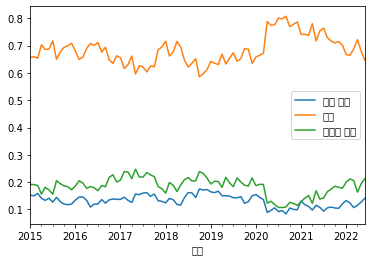

In [7]:
monthly_df[['기관 합계', '개인', '외국인 합계']].plot()

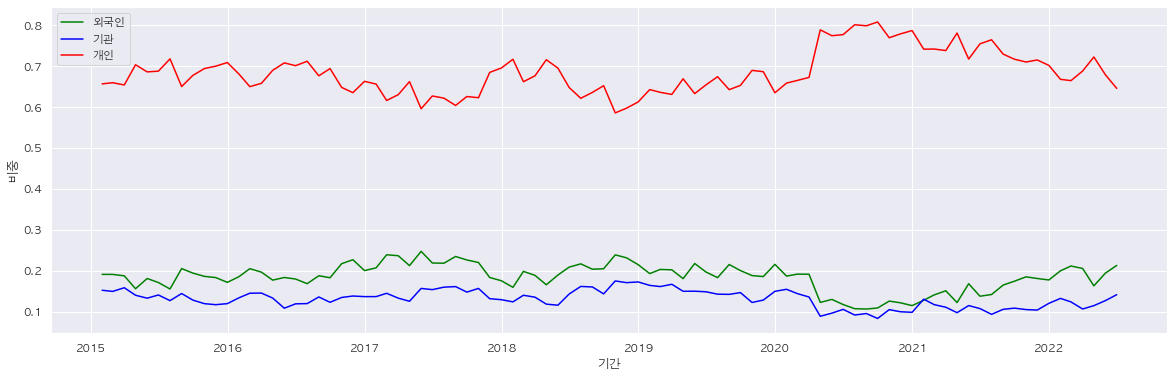

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
sns.set_theme()
%matplotlib inline
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

#set seaborn style


#define colors to use in chart
plt.subplots(figsize=(20, 6))
colors = ['green', 'blue', 'red']
plt.gca().set_prop_cycle(color=colors)
    
#create area chart
plt.plot(monthly_df.index, monthly_df['외국인 합계'], label='외국인')
plt.plot(monthly_df.index, monthly_df['기관 합계'], label='기관')
plt.plot(monthly_df.index, monthly_df['개인'], label='개인')

#add legend
plt.legend(loc='upper left')

#add axis labels
plt.xlabel('기간')
plt.ylabel('비중')

#display area chart
plt.show()